Lasso Optimisation
==================

This example demonstrates the use of class [bpdn.BPDNProjL1](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.BPDNProjL1) to solve the least absolute shrinkage and selection operator (lasso) problem [[43]](http://sporco.rtfd.org/en/latest/zreferences.html#tibshirani-1996-regression)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \| D \mathbf{x} - \mathbf{s} \|_2^2 \; \text{such that} \; \| \mathbf{x} \|_1 \leq \gamma$$

where $D$ is the dictionary, $\mathbf{x}$ is the sparse representation, and $\mathbf{s}$ is the signal to be represented. In this example the lasso problem is used to estimate the reference sparse representation that generated a signal from a noisy version of the signal.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import bpdn
from sporco import plot
plot.config_notebook_plotting()

Configure problem size, sparsity, and noise level.

In [2]:
N = 512      # Signal size
M = 4*N      # Dictionary size
L = 32       # Number of non-zero coefficients in generator
sigma = 0.5  # Noise level

Construct random dictionary, reference random sparse representation, and test signal consisting of the synthesis of the reference sparse representation with additive Gaussian noise.

In [3]:
# Construct random dictionary and random sparse coefficients
np.random.seed(12345)
D = np.random.randn(N, M)
x0 = np.zeros((M, 1))
si = np.random.permutation(list(range(0, M-1)))
x0[si[0:L]] = np.random.randn(L, 1)

# Construct reference and noisy signal
s0 = D.dot(x0)
s = s0 + sigma*np.random.randn(N,1)

Set [bpdn.BPDNProjL1](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.BPDNProjL1) solver class options. The value of $\gamma$ has been manually chosen for good performance.

In [4]:
gamma = 2.5e1
opt = bpdn.BPDNProjL1.Options({'Verbose': True, 'MaxMainIter': 500,
                    'RelStopTol': 1e-6, 'AutoRho': {'RsdlTarget': 1.0}})

Initialise and run BPDNProjL1 object

In [5]:
b = bpdn.BPDNProjL1(D, s, gamma, opt)
x = b.solve()

print("BPDNProjL1 solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s         ρ       
------------------------------------------------------
   0  1.65e+03  0.00e+00  6.90e-01  6.11e-01  1.00e+00
   1  5.35e+02  0.00e+00  3.52e-01  5.17e-01  1.00e+00
   2  6.26e+02  0.00e+00  2.15e-01  4.07e-01  1.00e+00
   3  7.28e+02  0.00e+00  1.90e-01  1.57e-01  1.00e+00
   4  4.10e+02  0.00e+00  1.79e-01  1.78e-01  1.00e+00
   5  3.37e+02  0.00e+00  1.59e-01  1.95e-01  1.00e+00
   6  4.04e+02  0.00e+00  1.71e-01  1.60e-01  1.00e+00
   7  4.36e+02  0.00e+00  1.58e-01  1.30e-01  1.00e+00
   8  3.84e+02  0.00e+00  1.46e-01  1.14e-01  1.00e+00
   9  2.57e+02  0.00e+00  1.27e-01  1.20e-01  1.00e+00
  10  2.89e+02  0.00e+00  1.14e-01  1.15e-01  1.00e+00
  11  3.57e+02  0.00e+00  1.12e-01  7.90e-02  1.00e+00
  12  2.53e+02  0.00e+00  1.09e-01  7.44e-02  1.00e+00
  13  2.04e+02  0.00e+00  1.04e-01  8.63e-02  1.00e+00
  14  2.57e+02  0.00e+00  1.07e-01  6.97e-02  1.00e+00
  15  2.43e+02  0.00e+00  1.07e-01  5.62e-02  1.00e+00
  16  2.10


  60  7.73e+01  7.27e-16  3.42e-02  4.42e-03  7.86e+01
  61  7.70e+01  0.00e+00  3.14e-02  7.09e-03  7.86e+01
  62  7.67e+01  0.00e+00  2.89e-02  6.18e-03  7.86e+01
  63  7.65e+01  1.12e-17  2.67e-02  4.48e-03  7.86e+01
  64  7.63e+01  1.16e-17  2.47e-02  3.85e-03  7.86e+01
  65  7.62e+01  0.00e+00  2.29e-02  3.44e-03  7.86e+01
  66  7.61e+01  0.00e+00  2.12e-02  3.07e-03  7.86e+01
  67  7.60e+01  7.36e-16  1.98e-02  2.86e-03  7.86e+01
  68  7.59e+01  0.00e+00  1.85e-02  2.35e-03  7.86e+01
  69  7.59e+01  0.00e+00  1.72e-02  1.92e-03  7.86e+01
  70  7.58e+01  7.30e-16  1.51e-02  3.38e-03  2.36e+02
  71  7.57e+01  7.27e-16  1.25e-02  5.35e-03  2.36e+02
  72  7.57e+01  0.00e+00  1.05e-02  5.31e-03  2.36e+02
  73  7.56e+01  0.00e+00  8.88e-03  4.67e-03  2.36e+02
  74  7.55e+01  0.00e+00  7.53e-03  3.77e-03  2.36e+02
  75  7.55e+01  7.27e-16  6.41e-03  2.82e-03  2.36e+02
  76  7.55e+01  3.46e-16  5.47e-03  2.25e-03  2.36e+02
  77  7.55e+01  1.26e-17  4.69e-03  2.17e-03  2.36e+02
  78  7.5

Plot comparison of reference and recovered representations.

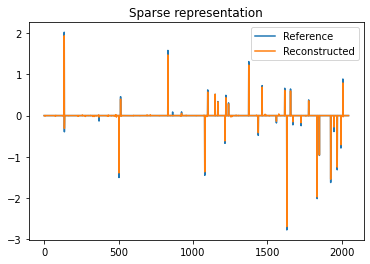

In [6]:
plot.plot(np.hstack((x0, x)), title='Sparse representation',
          lgnd=['Reference', 'Reconstructed'])

Plot functional value, residuals, and rho

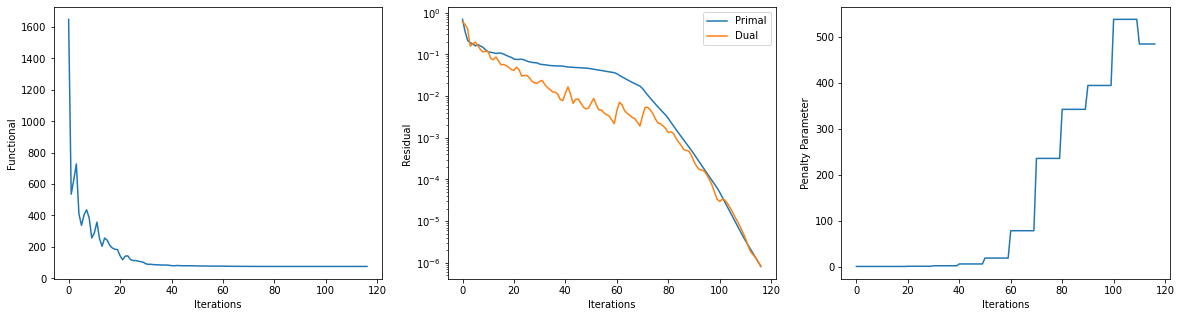

In [7]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()